In [1]:
#Import Block
import xml.etree.ElementTree as et
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
#DataRead Block

tree = et.parse('PRC Data Breach Chronology - 1.13.20.xml')
root = tree.getroot()

# Estrazione dei dati dal file XML e creazione di un dataframe Pandas
data = []
for elem in root:
    row = {}
    for subelem in elem:
        row[subelem.tag] = subelem.text
    data.append(row)
df = pd.DataFrame(data)

In [3]:
# Visualizzazione del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_Made_Public         9015 non-null   object
 1   Company                  9015 non-null   object
 2   City                     5690 non-null   object
 3   State                    8436 non-null   object
 4   Type_of_breach           9015 non-null   object
 5   Type_of_organization     9015 non-null   object
 6   Total_Records            9009 non-null   object
 7   Description_of_incident  9012 non-null   object
 8   Information_Source       8962 non-null   object
 9   Source_URL               3607 non-null   object
 10  Year_of_Breach           9015 non-null   object
 11  Latitude                 6541 non-null   object
 12  Longitude                6541 non-null   object
dtypes: object(13)
memory usage: 915.7+ KB


In [4]:
# Conta le occorrenze della Type_of_breach
quantita_per_colonna1 = df['Type_of_breach'].value_counts()

# Visualizza la quantità per colonna1
print(quantita_per_colonna1)

HACK    2533
DISC    1861
PHYS    1733
PORT    1172
UNKN     704
INSD     606
STAT     249
#N/A      89
CARD      68
Name: Type_of_breach, dtype: int64


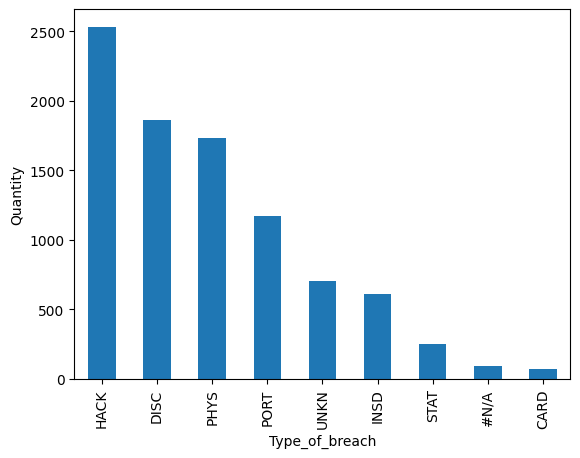

In [5]:
# Crea il grafico a barre
quantita_per_colonna1.plot(kind='bar')

# Aggiungi le etichette
plt.xlabel('Type_of_breach')
plt.ylabel('Quantity')

# Mostra il grafico
plt.show()

In [6]:
# Conta le occorrenze di ogni città
df_incidenza = df['City'].value_counts().reset_index()
df_incidenza.columns = ['City', 'occorrenze']

# Visualizza il dataframe
print(df_incidenza)

               City  occorrenze
0          New York         259
1        Washington         140
2     San Francisco         114
3       Los Angeles          93
4           Chicago          90
...             ...         ...
1545       Pembroke           1
1546        Jericho           1
1547        Lantana           1
1548     St. George           1
1549      Boonville           1

[1550 rows x 2 columns]


In [7]:
# Crea una mappa con un cerchio per ogni città
mappa = folium.Map(location=[41.8781, -87.6298], zoom_start=4)

for index, row in df_incidenza.iterrows():
    # Aggiungi un cerchio sulla mappa per visualizzare le occorrenze di ogni città
    folium.Circle(
        location=[df.loc[df['City'] == row['City'], 'Latitude'].iloc[0], 
                  df.loc[df['City'] == row['City'], 'Longitude'].iloc[0]],
        radius=row['occorrenze'] * 1000,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.3,
        tooltip=f"Occorrenze {row['City']}: {row['occorrenze']}"
    ).add_to(mappa)

# Visualizza la mappa
mappa


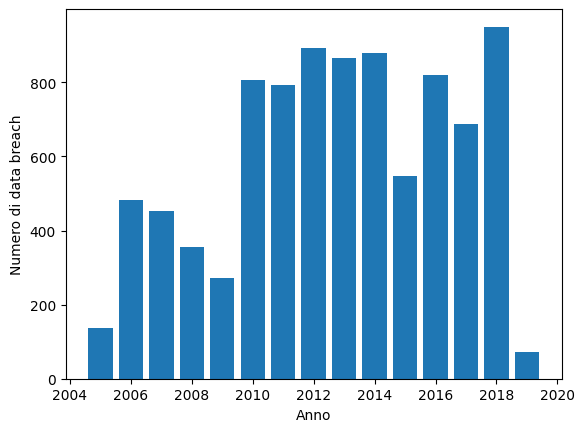

In [8]:
# Converti la colonna Date_Made_Public in formato datetime
df['Date_Made_Public'] = pd.to_datetime(df['Date_Made_Public'])

# Raggruppa per anno e conta le occorrenze
count_by_year = df.groupby(df['Date_Made_Public'].dt.year)['Company'].count()

# Crea il grafico a barre
fig, ax = plt.subplots()
ax.bar(count_by_year.index, count_by_year.values)

# Aggiungi le etichette dell'asse x e y
ax.set_xlabel('Anno')
ax.set_ylabel('Numero di data breach')

# Mostra il grafico
plt.show()


In [ ]:
# Crea una nuova colonna che rappresenta il mese dell'incidente
df['Month'] = df['Date_Made_Public'].dt.month_name()

# Raggruppa per mese e conta le occorrenze
count_by_month = df.groupby('Month')['Company'].count()

# Ordina i dati in ordine crescente dei mesi
count_by_month = count_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Crea il grafico a linee
fig, ax = plt.subplots()
ax.plot(count_by_month.index, count_by_month.values)

# Aggiungi le etichette dell'asse x e y
ax.set_xlabel('Mese')
ax.set_ylabel('Numero di data breach')

# Ruota le etichette dell'asse x di 90 gradi
ax.set_xticklabels(count_by_month.index, rotation=90)

# Mostra il grafico
plt.show()


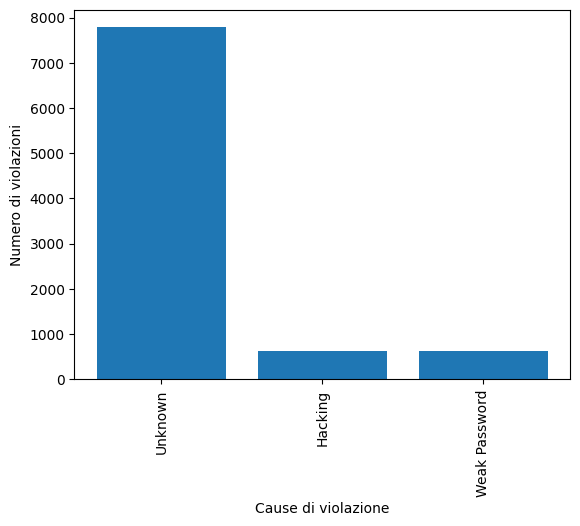

In [9]:
# Crea una nuova colonna 'Cause_of_breach' che contiene la causa principale del breach
df['Cause_of_breach'] = 'Unknown'

# Sostituzione dei valori NaN con stringa vuota nella colonna "Description_of_incident"
df["Description_of_incident"].fillna("", inplace=True)

df.loc[df['Description_of_incident'].str.contains('hacker|attack|cyber', case=False), 'Cause_of_breach'] = 'Hacking'
df.loc[df['Description_of_incident'].str.contains('password', case=False), 'Cause_of_breach'] = 'Weak Password'

# Ottiene la distribuzione delle cause di violazione
cause_counts = df["Cause_of_breach"].value_counts()

# Plotta i risultati
plt.bar(cause_counts.index, cause_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Cause di violazione")
plt.ylabel("Numero di violazioni")
plt.show()